# Correlation Matrix

It is used to calculate the correlation between different features.

In [1]:
%load_ext jupyter_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from utils import get_training_dataset

In [3]:
# Read csv file and import to df
df = get_training_dataset()

In [4]:
df = df.drop(columns=["grid_point_id", "typhoon_year"])
# df.head()

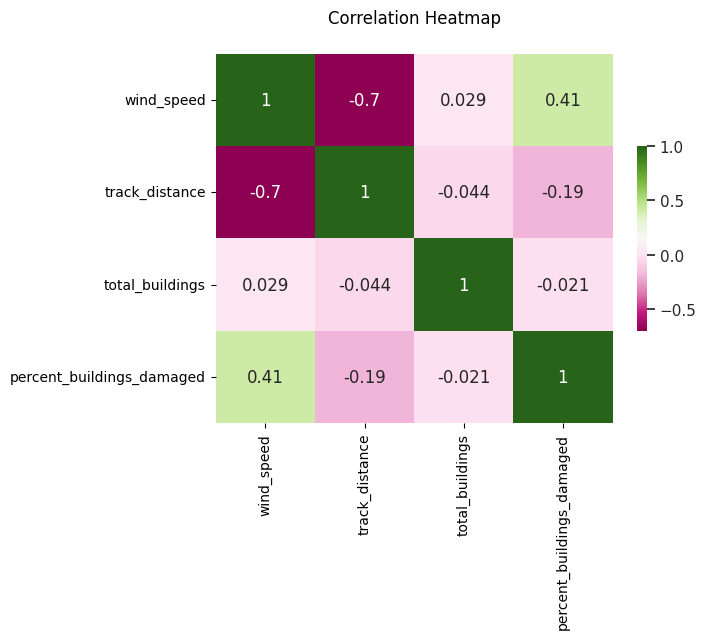

In [5]:
# Estimate correlation matrix

fig, ax = plt.subplots()

corrMatrix = df.corr()

plt.rcParams["figure.figsize"] = (4, 4)

sn.set(font_scale=1)
heatmap = sn.heatmap(
    corrMatrix,
    annot=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 12},
    cmap="PiYG",
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 12}, pad=22)

plt.show()

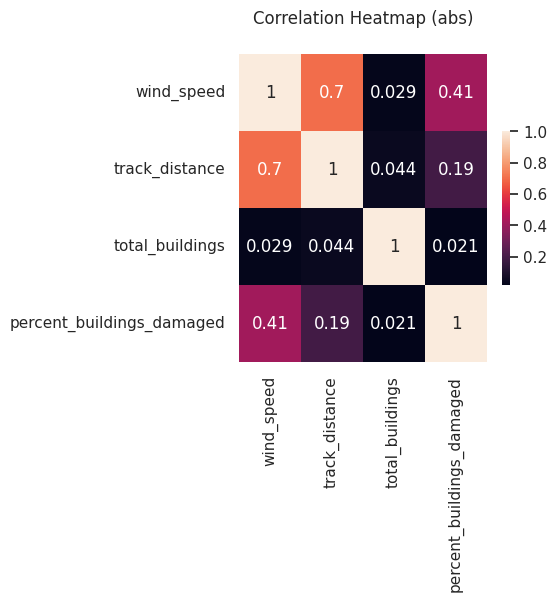

In [6]:
# The absolute value of correlation

fig, ax = plt.subplots()

corrMatrix_abs = df.corr().abs()
# print (corrMatrix)

plt.rcParams["figure.figsize"] = (4, 4)

sn.set(font_scale=1)
heatmap = sn.heatmap(
    corrMatrix_abs,
    annot=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 12},
)
heatmap.set_title(
    "Correlation Heatmap (abs)", fontdict={"fontsize": 12}, pad=22
)

plt.show()

In [7]:
# Print out correlated pairs of features
pair = (
    corrMatrix_abs.where(
        np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool)
    )
    .stack()
    .sort_values(ascending=True)
)
pairs = pair[pair.gt(0.8)]

if len(pairs) > 0:
    print(pairs)
else:
    print("No correlated features found!")

No correlated features found!


/tmp/ipykernel_938436/2928569256.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(np.bool)
